In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import sympy as sy
sy.init_printing() 

In [2]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display multiple results

In [4]:
def round_expr(expr, num_digits):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sy.Number)})

# <font face="gotham" color="purple"> Matrix Operations</font>

 1 矩阵的由来？
 > 为来简化线性方程组的写法，直接把系数，和结果的值写成一个 数据块（增广矩阵）。

 2 矩阵乘法的由来？
 > 为来求解这个线性方程组，求解过程
 
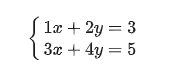
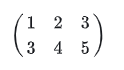
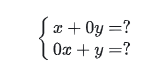
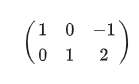

矩阵数学公式 md 写法
```
\begin{matrix}
10 & 12 \\
20 & 8
\end{matrix}
```




Matrix _addition_ operations are straightforward:
1. $A+ B= B+ A$
2. $(A+B)+ C=A+(B+C)$
3. $c(A+B)=cA+cB$
4. $(c+d)A=cA+c{D}$
5. $c(dA)=(cd)A$
6. $A+{0}=A$, where ${0}$ is the zero matrix
7. For any $A$, there exists an $- A$, such that $ A+(- A)=0$.

They are as obvious as it looks, so no proofs are provided. And the matrix _multiplication_ properties are:
1. $ A({BC})=({AB}) C$
2. $c({AB})=(cA)B=A(cB)$
3. $A(B+ C)={AB}+{AC}$
4. $(B+C)A={BA}+{CA}$

Note that we need to differentiate two kinds of multiplication, **Hadamard multiplication** (element-wise multiplication) and **matrix multiplication**: 

In [20]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

哈达玛积,对应元素相乘， 在numpy 和 sympy  中 * 和 @ 是不同的

In [7]:
A*B # this is Hadamard elementwise product

array([[ 5, 12],
       [21, 32]])

矩阵乘法规则运算,在numpy 中使用 @ 或者 numpy.dot() 函数进行

In [21]:
A@B # this is matrix product

A.dot(B)

array([[19, 22],
       [43, 50]])

array([[19, 22],
       [43, 50]])

We show explicitly the matrix multiplication rule:

In [10]:
A[0,:]*B[:,0]
A[1,:]*B[:,0]
A[0,:]*B[:,1]
A[1,:]*B[:,1]
np.sum(A[0,:]*B[:,0]) # (1, 1)
np.sum(A[1,:]*B[:,0]) # (2, 1)
np.sum(A[0,:]*B[:,1]) # (1, 2)
np.sum(A[1,:]*B[:,1]) # (2, 2)

array([ 5, 14])

array([15, 28])

array([ 6, 16])

array([18, 32])

19

43

22

50

## <font face="gotham" color="purple"> SymPy Demonstration: Addition </font>

Let's define all the letters as symbols in case we might use them repetitively.

In [13]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = sy.symbols('a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z', real = True)

In [14]:
A = sy.Matrix([[a, b, c], [d, e, f]])
A + A
A - A

⎡2⋅a  2⋅b  2⋅c⎤
⎢             ⎥
⎣2⋅d  2⋅e  2⋅f⎦

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

In [15]:
B = sy.Matrix([[g, h, i], [j, k, l]])
A + B
A - B

⎡a + g  b + h  c + i⎤
⎢                   ⎥
⎣d + j  e + k  f + l⎦

⎡a - g  b - h  c - i⎤
⎢                   ⎥
⎣d - j  e - k  f - l⎦

`` 矩阵的加法和减法运算必须在形状（行数和列数）相同的矩阵之间进行``


## <font face="gotham" color="purple"> SymPy Demonstration: Multiplication </font>

The matrix multiplication rules can be clearly understood by using symbols.

In [16]:
A = sy.Matrix([[a, b, c], [d, e, f]])
B = sy.Matrix([[g, h, i], [j, k, l], [m, n, o]])
A
B

⎡a  b  c⎤
⎢       ⎥
⎣d  e  f⎦

⎡g  h  i⎤
⎢       ⎥
⎢j  k  l⎥
⎢       ⎥
⎣m  n  o⎦

在 sympy 中  *  和 @ 都是乘法，应为 *被重写了

In [18]:
AB = A*B; AB
ab= A@B; ab

⎡a⋅g + b⋅j + c⋅m  a⋅h + b⋅k + c⋅n  a⋅i + b⋅l + c⋅o⎤
⎢                                                 ⎥
⎣d⋅g + e⋅j + f⋅m  d⋅h + e⋅k + f⋅n  d⋅i + e⋅l + f⋅o⎦

⎡a⋅g + b⋅j + c⋅m  a⋅h + b⋅k + c⋅n  a⋅i + b⋅l + c⋅o⎤
⎢                                                 ⎥
⎣d⋅g + e⋅j + f⋅m  d⋅h + e⋅k + f⋅n  d⋅i + e⋅l + f⋅o⎦

## <font face="gotham" color="purple"> Commutability </font>

The matrix multiplication usually do not commute, such that ${AB} \neq {BA}$. For instance, consider $ A$ and $ B$:

In [28]:
A = sy.Matrix([[3, 4], [7, 8]])
B = sy.Matrix([[5, 3], [2, 1]])
A*B
B*A

⎡23  13⎤
⎢      ⎥
⎣51  29⎦

⎡36  44⎤
⎢      ⎥
⎣13  16⎦

How do we find a commutable matrix?

In [22]:
A = sy.Matrix([[a, b], [c, d]])
B = sy.Matrix([[e, f], [g, h]])
A*B
B*A

⎡a⋅e + b⋅g  a⋅f + b⋅h⎤
⎢                    ⎥
⎣c⋅e + d⋅g  c⋅f + d⋅h⎦

⎡a⋅e + c⋅f  b⋅e + d⋅f⎤
⎢                    ⎥
⎣a⋅g + c⋅h  b⋅g + d⋅h⎦

To show ${AB} = {BA}$, we need to prove ${AB} - {BA} = 0$

In [30]:
M = A*B - B*A; M

⎡      b⋅g - c⋅f         a⋅f - b⋅e + b⋅h - d⋅f⎤
⎢                                             ⎥
⎣-a⋅g + c⋅e - c⋅h + d⋅g       -b⋅g + c⋅f      ⎦

That means

\begin{align}
b g - c f&=0 \\
a f - b e + b h - d f&=0\\
- a g + c e - c h + d g&=0 \\
- b g + c f&=0
\end{align}

If we treat $a, b, c, d$ as coefficients of the system, we and extract an augmented matrix

In [31]:
A_aug = sy.Matrix([[0, -c, b, 0], [-b, a-d, 0, b], [c, 0, d -a, -c], [0, c, -b, 0]]); A_aug

⎡0    -c      b     0 ⎤
⎢                     ⎥
⎢-b  a - d    0     b ⎥
⎢                     ⎥
⎢c     0    -a + d  -c⎥
⎢                     ⎥
⎣0     c      -b    0 ⎦

Perform **Gaussian-Jordon** elimination till row reduced formed.

In [32]:
A_aug.rref()

⎛⎡        a   d    ⎤        ⎞
⎜⎢1  0  - ─ + ─  -1⎥        ⎟
⎜⎢        c   c    ⎥        ⎟
⎜⎢                 ⎥        ⎟
⎜⎢        -b       ⎥        ⎟
⎜⎢0  1    ───    0 ⎥, (0, 1)⎟
⎜⎢         c       ⎥        ⎟
⎜⎢                 ⎥        ⎟
⎜⎢0  0     0     0 ⎥        ⎟
⎜⎢                 ⎥        ⎟
⎝⎣0  0     0     0 ⎦        ⎠

The general solution is 
\begin{align}
e - \frac{a-d}cg - h &=0\\
f - \frac{b}{c} & =0\\
g &= free\\
h & =free
\end{align}

if we set coefficients $a = 10, b = 12, c = 20, d = 8$, or $ A = \left[\begin{matrix}10 & 12\\20 & 8\end{matrix}\right]$ then general solution becomes


\begin{align}
e - .1g - h &=0\\
f - .6 & =0\\
g &= free\\
h & =free
\end{align}
Then try a special solution when $g = h = 1$
\begin{align}
e  &=1.1\\
f & =.6\\
g &=1 \\
h & =1
\end{align}
And this is a **commutable matrix of $A$**, we denote $ C$.

In [33]:
C = sy.Matrix([[1.1, .6], [1, 1]]);C

⎡1.1  0.6⎤
⎢        ⎥
⎣ 1    1 ⎦

Now we can see that ${AC}={CA}$.

In [34]:
A = sy.Matrix([[10, 12], [20, 8]])
A*C
C*A

⎡23.0  18.0⎤
⎢          ⎥
⎣30.0  20.0⎦

⎡23.0  18.0⎤
⎢          ⎥
⎣ 30    20 ⎦

# <font face="gotham" color="purple"> Transpose of Matrices </font>

Matrix $A_{n\times m}$ and its transpose is ; 转置就是把 行变成列，或者把列变成行

In [35]:
A = np.array([[1, 2, 3], [4, 5, 6]]); A
A.T # transpose

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [36]:
A = sy.Matrix([[1, 2, 3], [4, 5, 6]]); A
A.transpose()

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

⎡1  4⎤
⎢    ⎥
⎢2  5⎥
⎢    ⎥
⎣3  6⎦

The properties of transpose are
1. $(A^T)^T$
2. $(A+B)^T=A^T+B^T$
3. $(cA)^T=cA^T$
4. $(AB)^T=B^TA^T$

We can show why the last property holds with SymPy, define $A$ and $B$, multiply them, then transpose, that means $(AB)^T$

In [37]:
A = sy.Matrix([[a, b], [c, d], [e, f]])
B = sy.Matrix([[g, h, i], [j, k, l]])
AB = A*B
AB_tr = AB.transpose(); AB_tr

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

Transpose each of them, then multiply, that means $B^TA^T$

In [38]:
B_tr_A_tr = B.transpose()*A.transpose()
B_tr_A_tr

⎡a⋅g + b⋅j  c⋅g + d⋅j  e⋅g + f⋅j⎤
⎢                               ⎥
⎢a⋅h + b⋅k  c⋅h + d⋅k  e⋅h + f⋅k⎥
⎢                               ⎥
⎣a⋅i + b⋅l  c⋅i + d⋅l  e⋅i + f⋅l⎦

To see if they are equal

In [39]:
AB_tr - B_tr_A_tr

⎡0  0  0⎤
⎢       ⎥
⎢0  0  0⎥
⎢       ⎥
⎣0  0  0⎦

# <font face="gotham" color="purple"> Identity Matrices - 单位矩阵 </font>

>对比 线性代数中 一个任意的 x  有 x*z=x   也就是一个以任意的数 乘以一个数还是它自己， 可以得到 z=1 ； 在矩阵中也是这样的 对于一个任意的 n 维矩阵 也存在一个 n维的矩阵 a  和它相乘 使得矩阵不会还是它自己。
对角线全是1，其他全是0;

This is an identity matrix $I_5$

>注意：单位矩阵和线性方程组有本质的联系，为什么是对角线1，其他为0 ？ 每行为什么只有一个1？  为什么1只能在对角线上？ 1 表示 这个自变量没有被删除，对角线，表示每个方程组都不会被消除 并且 全部把 未知数的系数消为一。

> 其实也可以联想到 矩阵乘法的一种理解方式： 1 表示这个线性方程组 *1 ； 周围的0 这表示 对应 的方程 乘 *0   最后在把这些方程组给相加

In [40]:
sy.eye(5)

⎡1  0  0  0  0⎤
⎢             ⎥
⎢0  1  0  0  0⎥
⎢             ⎥
⎢0  0  1  0  0⎥
⎢             ⎥
⎢0  0  0  1  0⎥
⎢             ⎥
⎣0  0  0  0  1⎦

Identity matrix properties:

$$
AI=IA = A
$$

Let's generate $ I$ and $ A$ and show if it holds

In [41]:
I = np.eye(5); I

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [42]:
A = np.around(np.random.rand(5, 5)*100); A # generate a random matrix

array([[76.,  9., 58., 36., 96.],
       [38., 20., 29., 83.,  3.],
       [55., 98., 52., 36., 55.],
       [63., 99., 39., 17., 26.],
       [94., 81., 64., 25., 61.]])

Apparently it holds

In [43]:
A@I - I@A

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

# <font face="gotham" color="purple"> Elementary Matrix 初等矩阵 </font>
初等矩阵 是 单位矩阵 经过一次 初等变换得到的。 
1. 行和行的变换- 对换变换
2. 行× 常数的变换- 倍乘变换
3. 行加上 另一行的变换- 加倍变换

An **elementary matrix** is a matrix that can be obtained from a single elementary row operation on an identity matrix. Such as:

$$
[  
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}

\overset{R_1 \leftrightarrow R_2}{\longrightarrow}

\begin{bmatrix}
0 & 1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 1
\end{bmatrix}
]
$$

where $R_1\leftrightarrow R_2$ means exchanging row $1$ and row $2$, and we denote the transformed matrix as ${E}$, then left multiply $  E$ onto a matrix $  A$. Generate $ A$ first

In [44]:
A = sy.randMatrix(3, percent = 80); A # generate a random matrix with 80% of entries being nonzero

⎡88  0   97⎤
⎢          ⎥
⎢55  9   71⎥
⎢          ⎥
⎣0   31  2 ⎦

Create an elementary matrix with $R_1\leftrightarrow R_2$

In [45]:
E = sy.Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 1]]);E

⎡0  1  0⎤
⎢       ⎥
⎢1  0  0⎥
⎢       ⎥
⎣0  0  1⎦

It turns out that by left-multiplying $ E$ onto $ A$, $ A$ also switches the row $1$ and $2$. 

会发现- 单位矩阵的初等变化 可以映射的  矩阵的变换；交换，乘一个数
注意 $E*A$  初等矩阵在左边，和 $A*E$  是不同的，当然也是有规律可寻

In [46]:
E*A

⎡55  9   71⎤
⎢          ⎥
⎢88  0   97⎥
⎢          ⎥
⎣0   31  2 ⎦

Adding a multiple of a row onto another row in the identity matrix also gives us an elementary matrix.

$$
[
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\overset{R_3 - 7R_1}{\longrightarrow}
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
-7 & 0 & 1
\end{bmatrix}
]
$$

Let's verify with SymPy.

In [47]:
A = sy.randMatrix(3, percent = 80); A
E = sy.Matrix([[1, 0, 0], [0, 1, 0], [-7, 0, 1]]); E

⎡73  47  0 ⎤
⎢          ⎥
⎢30  63  79⎥
⎢          ⎥
⎣82  31  0 ⎦

⎡1   0  0⎤
⎢        ⎥
⎢0   1  0⎥
⎢        ⎥
⎣-7  0  1⎦

In [48]:
E*A

⎡ 73    47   0 ⎤
⎢              ⎥
⎢ 30    63   79⎥
⎢              ⎥
⎣-429  -298  0 ⎦

We can also show this by explicit row operation on $ A$.

In [49]:
EA = sy.matrices.MatrixBase.copy(A)
EA[2,:]=-7*EA[0,:]+EA[2,:]
EA

⎡ 73    47   0 ⎤
⎢              ⎥
⎢ 30    63   79⎥
⎢              ⎥
⎣-429  -298  0 ⎦

In next section, we will see an important conclusion of elementary matrices multiplication is that an **invertible matrix** is a product of a series of elementary matrices.

# <font face="gotham" color="purple"> Inverse Matrices 逆矩阵</font>

If ${AB}={BA}=\mathbf{I}$, $ B$ is called the inverse of matrix $  A$, denoted as $ B=  A^{-1}$.


NumPy has convenient function ```np.linalg.inv()``` for computing inverse matrices. Generate $ A$

In [ ]:
A = np.round(10*np.random.randn(5,5)); A

In [51]:
Ainv = np.linalg.inv(A); Ainv

array([[-0.124, -0.047,  0.038, -0.076, -0.144],
       [-0.009,  0.062, -0.014,  0.02 ,  0.025],
       [ 0.082,  0.05 ,  0.111, -0.011,  0.103],
       [ 0.032,  0.047,  0.036,  0.056,  0.112],
       [-0.05 , -0.027, -0.007,  0.005, -0.108]])

Verify if they are truly inverse of each other

In [52]:
A@Ainv

array([[ 1., -0., -0., -0.,  0.],
       [ 0.,  1., -0.,  0.,  0.],
       [ 0., -0.,  1.,  0., -0.],
       [ 0., -0., -0.,  1.,  0.],
       [ 0.,  0., -0., -0.,  1.]])

The ```-0.``` means there are more digits after point, but omitted here.


## $[A\,|\,I] \sim [I\,|\,A^{-1}]$ <font face="gotham" color="purple"> Algorithm </font>


A convenient way of calculating inverse is that we can construct an augmented matrix $[ A\,|\,\mathbf{I}]$, then multiply a series of $ E$'s which are elementary row operations till matrix $A$ becomes row reduced form, if full rank it means $ A \rightarrow \mathbf{I}$. Then $\mathbf{I}$ on the RHS of augmented matrix will be converted into $ A^{-1}$ automatically. 

We can show with SymPy's ```.rref()``` function on the augmented matrix $[A\,|\,I]$.

In [53]:
AI = np.hstack((A, I)) # stack the matrix A and I horizontally
AI = sy.Matrix(AI); AI

⎡-9.0  -1.0  7.0   -11.0   7.0   1.0   0    0    0    0 ⎤
⎢                                                       ⎥
⎢-1.0  18.0  5.0   -7.0    3.0    0   1.0   0    0    0 ⎥
⎢                                                       ⎥
⎢3.0   -4.0  6.0    6.0    7.0    0    0   1.0   0    0 ⎥
⎢                                                       ⎥
⎢-4.0  -4.0  -2.0  12.0   15.0    0    0    0   1.0   0 ⎥
⎢                                                       ⎥
⎣4.0   -4.0  -5.0   7.0   -13.0   0    0    0    0   1.0⎦

In [54]:
AI_rref = AI.rref(); AI_rref

⎛⎡1  0  0  0  0   -0.123660201747544   -0.0473344259134291   0.038105921842545
⎜⎢                                                                            
⎜⎢0  1  0  0  0  -0.00907075186454344  0.0620842572062084   -0.013505341664986
⎜⎢                                                                            
⎜⎢0  0  1  0  0   0.0821801354916172   0.0495999228766991    0.111245979509741
⎜⎢                                                                            
⎜⎢0  0  0  1  0   0.0316994294628537   0.0472862238503808    0.036085817200248
⎜⎢                                                                            
⎝⎣0  0  0  0  1   -0.049797113134624   -0.0272823676853369  -0.007475701778217

8   -0.0757736431119252  -0.144422144904166⎤                 ⎞
                                           ⎥                 ⎟
9   0.0199556541019956   0.0251965329570651⎥                 ⎟
                                           ⎥                 ⎟
    -0.0112310806902535  0.102639720

Extract the RHS block, this is the $A^{-1}$.

In [55]:
Ainv = AI_rref[0][:,5:];Ainv # extract the RHS block

⎡ -0.123660201747544   -0.0473344259134291   0.0381059218425458   -0.075773643
⎢                                                                             
⎢-0.00907075186454344  0.0620842572062084   -0.0135053416649869   0.0199556541
⎢                                                                             
⎢ 0.0821801354916172   0.0495999228766991    0.111245979509741    -0.011231080
⎢                                                                             
⎢ 0.0316994294628537   0.0472862238503808    0.0360858172002489   0.0563482117
⎢                                                                             
⎣ -0.049797113134624   -0.0272823676853369  -0.00747570177821793  0.0052058228

1119252  -0.144422144904166⎤
                           ⎥
019956   0.0251965329570651⎥
                           ⎥
6902535  0.102639720252754 ⎥
                           ⎥
034609    0.11242912105729 ⎥
                           ⎥
0921623  -0.108051497331358⎦

I wrote a function to round the float numbers to the $4$th digits, on the top of this file, but this is not absolutely necessary.

In [56]:
round_expr(Ainv, 4) 

⎡-0.1237  -0.0473  0.0381   -0.0758  -0.1444⎤
⎢                                           ⎥
⎢-0.0091  0.0621   -0.0135   0.02    0.0252 ⎥
⎢                                           ⎥
⎢0.0822   0.0496   0.1112   -0.0112  0.1026 ⎥
⎢                                           ⎥
⎢0.0317   0.0473   0.0361   0.0563   0.1124 ⎥
⎢                                           ⎥
⎣-0.0498  -0.0273  -0.0075  0.0052   -0.1081⎦

We can verify if $AA^{-1}=\mathbf{I}$

In [57]:
A = sy.Matrix(A)
round_expr(A*Ainv, 4) 

⎡1.0   0    0    0    0 ⎤
⎢                       ⎥
⎢ 0   1.0   0    0    0 ⎥
⎢                       ⎥
⎢ 0    0   1.0   0    0 ⎥
⎢                       ⎥
⎢ 0    0    0   1.0   0 ⎥
⎢                       ⎥
⎣ 0    0    0    0   1.0⎦

We got $\mathbf{I}$, which means the RHS block is indeed $A^{-1}$.

## <font face="gotham" color="purple"> An Example of Existence of Inverse </font>

Determine the values of $\lambda$ such that the matrix
$$A=\left[ \begin{matrix}3 &\lambda &1\cr 2 & -1 & 6\cr 1 & 9 & 4\end{matrix}\right]$$
is not invertible.
> 引入一个 $\lambda$ 满足矩阵可逆

> 问题： 矩阵的可逆 在线性方程组中的 又表示什么？

Still,we are using SymPy to solve the problem.

In [58]:
lamb = sy.symbols('lamda') # SymPy will automatically render into LaTeX greek letters
A = np.array([[3, lamb, 1], [2, -1, 6], [1, 9, 4]])
I = np.eye(3); A

array([[3, lamda, 1],
       [2, -1, 6],
       [1, 9, 4]], dtype=object)

Form the augmented matrix.

In [59]:
AI = np.hstack((A, I))
AI = sy.Matrix(AI); AI

⎡3  λ   1  1.0   0    0 ⎤
⎢                       ⎥
⎢2  -1  6   0   1.0   0 ⎥
⎢                       ⎥
⎣1  9   4   0    0   1.0⎦

In [60]:
AI_rref = AI.rref()
AI_rref

⎛⎡             116.0       8.0⋅λ - 18.0  -12.0⋅λ - 2.0⎤           ⎞
⎜⎢1  0  0  ─────────────  ─────────────  ─────────────⎥           ⎟
⎜⎢         4.0⋅λ + 310.0  4.0⋅λ + 310.0  4.0⋅λ + 310.0⎥           ⎟
⎜⎢                                                    ⎥           ⎟
⎜⎢              4.0           -22.0           32.0    ⎥           ⎟
⎜⎢0  1  0  ─────────────  ─────────────  ─────────────⎥, (0, 1, 2)⎟
⎜⎢         4.0⋅λ + 310.0  4.0⋅λ + 310.0  4.0⋅λ + 310.0⎥           ⎟
⎜⎢                                                    ⎥           ⎟
⎜⎢             57.0          27.0 - λ     2.0⋅λ + 3.0 ⎥           ⎟
⎜⎢0  0  1   ──────────    ─────────────  ─────────────⎥           ⎟
⎝⎣          -6⋅λ - 465    2.0⋅λ + 155.0  2.0⋅λ + 155.0⎦           ⎠

To make the matrix $A$ invertible we notice that is one conditions to be satisfied (in the denominators):
\begin{align}
-6\lambda -465 &\neq0\\
\end{align}

Solve for $\lambda$'s.

In [61]:
sy.solvers.solve(-6*lamb-465, lamb)

So this is one of $\lambda$ that cause the matrix invertible. Let's test with **determinant**. If $| A|=0$, then the matrix is not invertible. Don't worry about determinants, we will get back to this. 

In [62]:
A = np.array([[3, -155/2, 1], [2, -1, 6], [1, 9, 4]])
np.linalg.det(A)

The $| A|$ is $0$. 

So we found that one condition, as long as $\lambda \neq -\frac{155}{2}$, the matrix $A$ is invertible.

## <font face="gotham" color="purple"> Properties of Inverse Matrices </font>

1. If $A$ and $B$ are both invertible, then $(AB)^{-1}=B^{-1}A^{-1}$.
2. If $A$ is invertible, then $(A^T)^{-1}=(A^{-1})^T$.
3. If $A$ and $B$ are both invertible and symmetric such that $AB=BA$, then $A^{-1}B$ is symmetric.

The _first property_ is straightforward
\begin{align}
ABB^{-1}A^{-1}=AIA^{-1}=I=AB(AB)^{-1}
\end{align}

The trick of _second property_ is to show that
$$
A^T(A^{-1})^T = I
$$
We can use the property of transpose
$$
A^T(A^{-1})^T=(A^{-1}A)^T = I^T = I
$$

The _third property_ is to show
$$
A^{-1}B = (A^{-1}B)^T
$$
Again use the property of transpose
$$
(A^{-1}B)^{T}=B^T(A^{-1})^T=B(A^T)^{-1}=BA^{-1}
$$
We use the $AB = BA$ condition to proceed
\begin{align}
AB&=BA\\
A^{-1}ABA^{-1}&=A^{-1}BAA^{-1}\\
BA^{-1}&=A^{-1}B
\end{align}
The plug in the previous equation, we have
$$
(A^{-1}B)^{T}=BA^{-1}=A^{-1}B
$$